In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

In [2]:
#reading in the data
all_data = pd.read_csv('/home/amybirdee/hobby_projects/health_first/all_data.csv', delimiter = ',')

In [3]:
all_data.head()

,user_id,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six,message_type,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker
0,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,1.026933,0.0,0.0,0.0,0.0
1,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.295621,0.0,0.0,0.0,0.0
2,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.069245,0.0,0.0,0.0,0.0
3,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.141559,0.0,0.0,0.0,0.0
4,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.109137,0.0,0.0,0.0,0.0


In [4]:
#won't need the customer id for the analysis so dropping this
all_data_edited = all_data.drop('user_id', axis = 1)

In [5]:
#target variable is churned_after_six - this needs to be a binary column so changing to 0/1
all_data_edited['churned_after_six'] = all_data_edited['churned_after_six'].replace({'Churn': 1, 'No churn': 0})
all_data_edited.reset_index(drop = True).head(10)

,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six,message_type,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker
0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,1.026933,0.0,0.0,0.0,0.0
1,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.295621,0.0,0.0,0.0,0.0
2,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.069245,0.0,0.0,0.0,0.0
3,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.141559,0.0,0.0,0.0,0.0
4,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.109137,0.0,0.0,0.0,0.0
5,high,F,health,motivation,emotions,66,154.9,60.3,0.0,private,0,0.265918,0.0,0.0,0.0,0.0
6,high,F,health,motivation,emotions,66,154.9,60.3,0.0,private,0,0.353553,0.0,0.0,0.0,0.0
7,high,F,health,motivation,emotions,66,154.9,60.3,0.0,group,0,0.184948,0.0,0.0,0.0,0.0
8,high,F,health,motivation,emotions,66,154.9,60.3,0.0,group,0,1.272792,0.0,0.0,0.0,0.0
9,high,F,health,motivation,emotions,66,154.9,60.3,0.0,group,1,0.039382,0.0,0.0,0.0,0.0


In [6]:
#counting how many 0s and 1s we have in churn column - 21197 instances of no churn and 2218 instances of churn
print(all_data_edited.churned_after_six.value_counts())

0.0    21197
1.0     2218
Name: churned_after_six, dtype: int64


In [7]:
#creating dummy values for all categorical variables to use in model
all_data_dummy = pd.get_dummies(all_data_edited)
all_data_dummy.reset_index(drop = True).head()

,age,height,weight,churned_after_six,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker,...,trigger_emotions,trigger_other,trigger_routine,trigger_social,trigger_stress,trigger_supermarket,trigger_tired,trigger_treats,message_type_group,message_type_private
0,25,156.2,99.3,NaN,0,1.026933,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,25,156.2,99.3,NaN,0,0.295621,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
2,25,156.2,99.3,NaN,0,0.069245,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,25,156.2,99.3,NaN,3,0.141559,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,25,156.2,99.3,NaN,3,0.109137,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
#checking datatypes
all_data_dummy.dtypes

age                         int64
height                    float64
weight                    float64
churned_after_six         float64
week_number                 int64
sentiment                 float64
questions_asked           float64
emojis_used               float64
mentioned_scales          float64
mentioned_tracker         float64
goals_high                  uint8
goals_low                   uint8
goals_medium                uint8
goals_not answered          uint8
gender_F                    uint8
gender_M                    uint8
motivation_control          uint8
motivation_fitness          uint8
motivation_health           uint8
motivation_looks            uint8
motivation_other            uint8
challenge_food              uint8
challenge_information       uint8
challenge_motivation        uint8
challenge_not answered      uint8
challenge_other             uint8
challenge_time              uint8
trigger_emotions            uint8
trigger_other               uint8
trigger_routin

# **Correlation analysis**

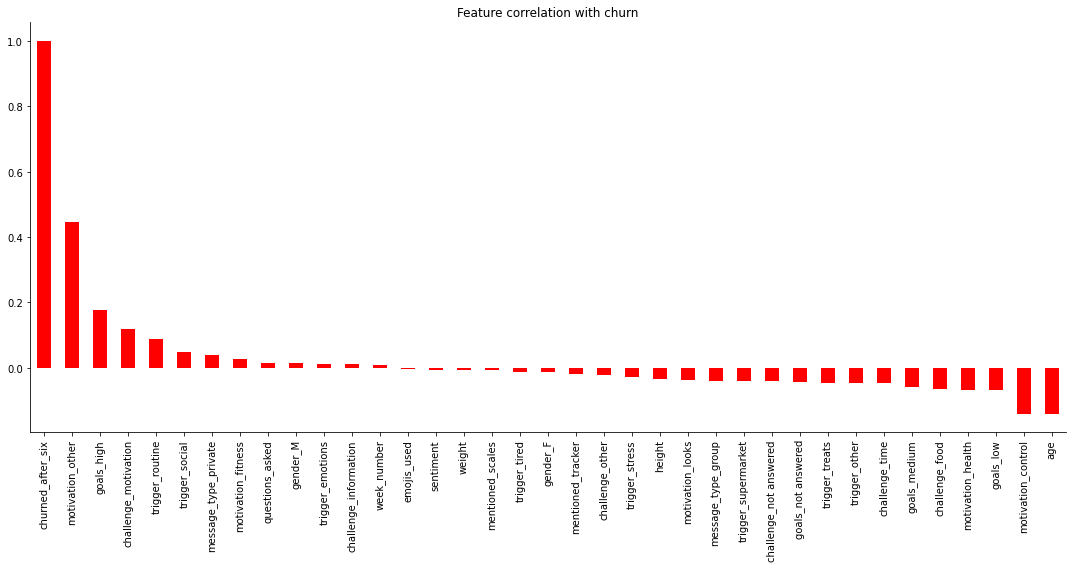

In [9]:
#plot correlations between target feature (churn) and all other variables - a lack of motivation and overly ambitious goals
#have the highest correlation with churn. Age, more achievable ambitions and a health motivation has the lowest correlation
fig = plt.figure(figsize = (15,8))
ax = plt.subplot()
all_data_dummy.corr()['churned_after_six'].sort_values(ascending = False).plot(kind = 'bar', color = 'red')
plt.title('Feature correlation with churn', fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('churn_correlation')

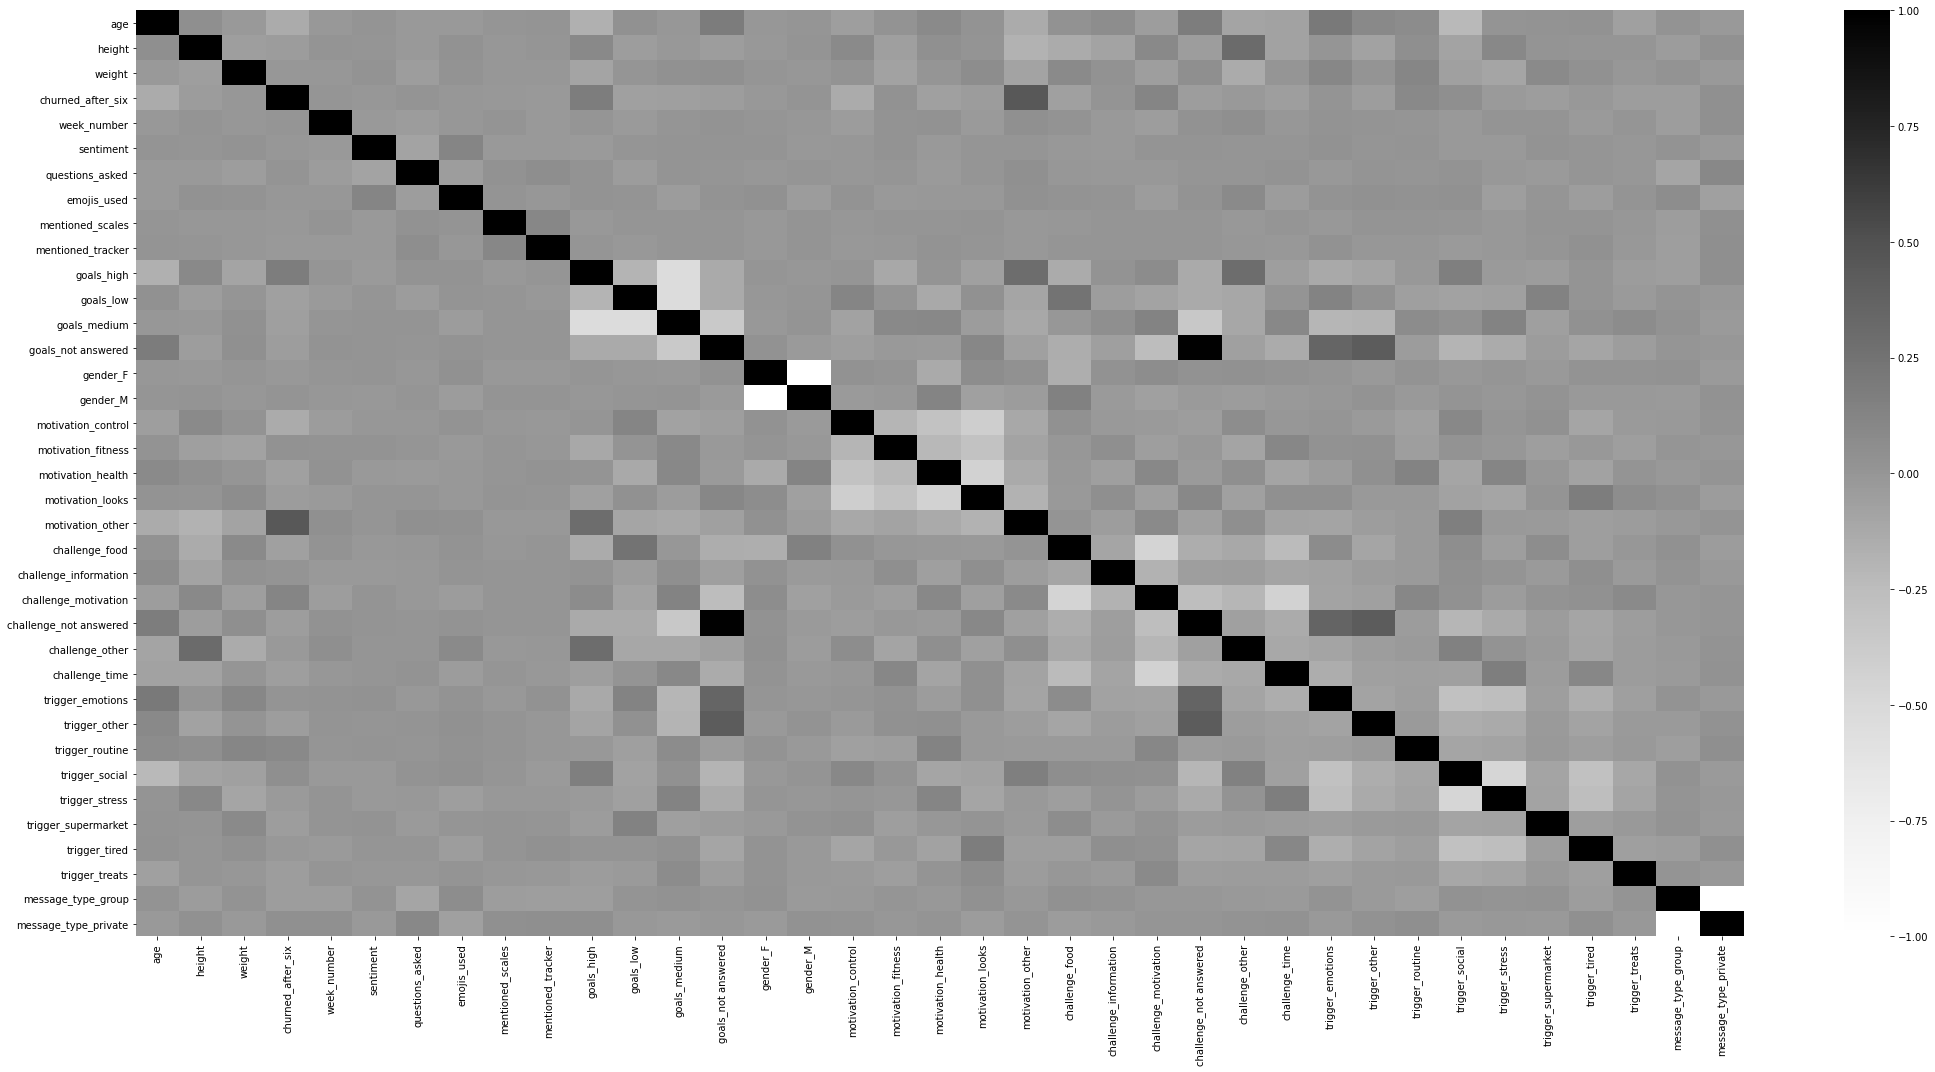

In [10]:
#plotting correlations on a heatmap
fig, ax = plt.subplots(figsize = (30,15))
sns.heatmap(all_data_dummy.corr(), cmap = 'Greys')
plt.tight_layout()
plt.savefig('heatmap')

In [11]:
#splitting data into known and unknown data. The known data will be used to train the model
known_data = all_data_dummy[all_data_dummy['churned_after_six'].notnull()]

unknown_data = all_data_dummy[all_data_dummy['churned_after_six'].isnull()]

unknown_data.head()

,age,height,weight,churned_after_six,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker,...,trigger_emotions,trigger_other,trigger_routine,trigger_social,trigger_stress,trigger_supermarket,trigger_tired,trigger_treats,message_type_group,message_type_private
0,25,156.2,99.3,NaN,0,1.026933,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,25,156.2,99.3,NaN,0,0.295621,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
2,25,156.2,99.3,NaN,0,0.069245,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,25,156.2,99.3,NaN,3,0.141559,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,25,156.2,99.3,NaN,3,0.109137,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
#splitting the data into independent and dependent variables for the known data

y = known_data.churned_after_six.values

X = known_data.drop('churned_after_six', axis = 1)

#saving the X value columns to a separate list for reassigning after scaling the data
known_data_columns = X.columns 

In [13]:
#categorical variables are scaled but also need to scale the numerical variables, e.g. age, height, weight

#instantiate the MinMaxScaler
scaler = MinMaxScaler()

#fit the scaler to X to transform the data. Converting to dataframe as well - otherwise it would be a NumPy array
X = pd.DataFrame(scaler.fit_transform(X))

#reassign the column names
X.columns = known_data_columns

X.head()

,age,height,weight,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker,goals_high,...,trigger_emotions,trigger_other,trigger_routine,trigger_social,trigger_stress,trigger_supermarket,trigger_tired,trigger_treats,message_type_group,message_type_private
0,0.86,0.103734,0.021833,0.000000,0.547588,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.86,0.103734,0.021833,0.000000,0.573724,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.86,0.103734,0.021833,0.000000,0.523439,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.86,0.103734,0.021833,0.000000,0.847878,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.86,0.103734,0.021833,0.166667,0.480026,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
#checking shape of training and testing sets - all 7043 records are there
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (18732, 36)
X_test shape: (4683, 36)
y_train shape: (18732,)
y_test shape: (4683,)


# **Fitting and evaluating logisitic regression model**

In [16]:
#fitting the model. Liblinear is and algorithim which will help optimise the results.
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
#predicting the churn values for X_train and X_test
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [18]:
#evaluating the model - finding the residual differences between train data and predicted train data
residuals = np.abs(y_train - y_pred_train)

#print value counts of predicted values
print(pd.Series(residuals).value_counts())

print('')

#print normalised value counts for predicted values - 93% of churn predictions were correct on the train data set
print(pd.Series(residuals).value_counts(normalize = True))

0.0    17450
1.0     1282
dtype: int64

0.0    0.931561
1.0    0.068439
dtype: float64


In [19]:
#evaluating the model for the test data - finding the residual differences between test data and predicted test data
residuals_test = np.abs(y_test - y_pred_test)

#print value counts of predicted values
print(pd.Series(residuals_test).value_counts())

print('')

#print normalised value counts for predicted values - 93% of churn predictions were correct on the test data set
print(pd.Series(residuals_test).value_counts(normalize = True))

0.0    4360
1.0     323
dtype: int64

0.0    0.931027
1.0    0.068973
dtype: float64


In [20]:
#printing the confusion matrix - we are trying to limit false negatives (i.e. when we predict a customer will not churn
#but they do). When trying to limit false negatives we want to optimise on recall rather than precision

#158 = true positive, 4202 = true negative, 294 = false negative, 29 = false positive
matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix \n', matrix)

Confusion matrix 
 [[4202   29]
 [ 294  158]]


In [21]:
#visualising the confusion matrix with labels
y_test_df = pd.Series(y_test)
y_pred_test_df = pd.Series(y_pred_test)

pd.crosstab(y_test_df, y_pred_test_df, rownames = ['True'], colnames = ['Predicted'], margins = True).reset_index()

Predicted,True,0.0,1.0,All
0,0,4202,29,4231
1,1,294,158,452
2,All,4496,187,4683


In [22]:
#concatenating the series into a dataframe and adding a new row to describe what the result is in each. The function uses
#if statements to define the result

results = pd.concat([y_test_df, y_pred_test_df], axis = 1).rename(columns = {0: 'actual', 1: 'prediction'})

def regression_results(row):
    if row['actual'] == 1 and row['prediction'] == 1:
        return 'actual = churn and prediction = churn - True positive'
    if row['actual'] == 0 and row['prediction'] == 0:
        return 'actual = no churn and prediction =  no churn - True negative'
    if row['actual'] == 0 and row['prediction'] == 1:
        return 'actual = no churn but prediction = churn - False positive'
    if row['actual'] == 1 and row['prediction'] == 0:
        return 'actual = churn but prediction = no churn - False negative'

#applying the above function to a new row    
results['result'] = results.apply(lambda row: regression_results(row), axis = 1)
print(results.head())

   actual  prediction                                             result
0     0.0         0.0  actual = no churn and prediction =  no churn -...
1     0.0         0.0  actual = no churn and prediction =  no churn -...
2     0.0         0.0  actual = no churn and prediction =  no churn -...
3     0.0         0.0  actual = no churn and prediction =  no churn -...
4     0.0         0.0  actual = no churn and prediction =  no churn -...


In [23]:
#grouping the results to compare with the confustion matrix
results_grouped = results.groupby('result').size()
results_grouped

result
actual = churn and prediction = churn - True positive            158
actual = churn but prediction = no churn - False negative        294
actual = no churn and prediction =  no churn - True negative    4202
actual = no churn but prediction = churn - False positive         29
dtype: int64

In [24]:
#printing out the scores for precision, recall, accuracy and F1 for y_test and y_pred_test
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      4231
         1.0       0.84      0.35      0.49       452

    accuracy                           0.93      4683
   macro avg       0.89      0.67      0.73      4683
weighted avg       0.93      0.93      0.92      4683



In [25]:
#another way to print the scores, pos_label tells sklearn what class you want to print - we want 1 as that's the 'will 
#churn' class. We want to optimise recall but the score is showing just 0.34 on the training set and 0.35 on the testing
#set. Hopefully AUC score will be better

precision_train = precision_score(y_train, y_pred_train, pos_label = 1)
precision_test = precision_score(y_test, y_pred_test, pos_label = 1)

recall_train = recall_score(y_train, y_pred_train, pos_label = 1)
recall_test = recall_score(y_test, y_pred_test, pos_label = 1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train, pos_label = 1)
f1_test = f1_score(y_test, y_pred_test, pos_label = 1)

print('Precision train: ', round(precision_train, 2))
print('Precision test: ', round(precision_test, 2))
print('')
print('Recall train: ', round(recall_train, 2))
print('Recall test: ', round(recall_test, 2))
print('')
print('Accuracy train: ', round(accuracy_train, 2))
print('Accuracy test: ', round(accuracy_test, 2))
print('')
print('F1 train: ', round(f1_train, 2))
print('F1 test: ', round(f1_test, 2))
print('')

Precision train:  0.84
Precision test:  0.84

Recall train:  0.34
Recall test:  0.35

Accuracy train:  0.93
Accuracy test:  0.93

F1 train:  0.48
F1 test:  0.49



In [26]:
#calculating probabilities scores for test and train sets
prob_train = logistic_model.predict_proba(X_train)
prob_test = logistic_model.predict_proba(X_test)

#keeping probabilities for positive outcome only (the threshold is 0.5 which means, if the predicted probability of the 
#class for an instance is less than 0.5, that instance is predicted to be in class 0 (the negative class). If the 
#probability of the class for an instance is equal or greater than 0.5, the instance is classified as class 1.)
prob_train_churn = prob_train[:, 1]
prob_test_churn = prob_test[:, 1]

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for train set
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob_train_churn)

#calculate false positive rate (fpr), true positive rate (tpr) and thresholds for test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, prob_test_churn)

In [27]:
#calculating AUC (Area Under Curve) - this gives a single numeric metric to evaluate the model. An AUC value of 1 would 
#represent a perfect classifier. If AUC = 0.5 the classifier only has 50% preision. AUC scores above 0.8 so pretty good.

auc_train = auc(train_fpr, train_tpr)
auc_test = auc(test_fpr, test_tpr)
print('Training AUC: ', round(auc_train, 2))
print('Testing AUC: ', round(auc_test, 2))

Training AUC:  0.84
Testing AUC:  0.83


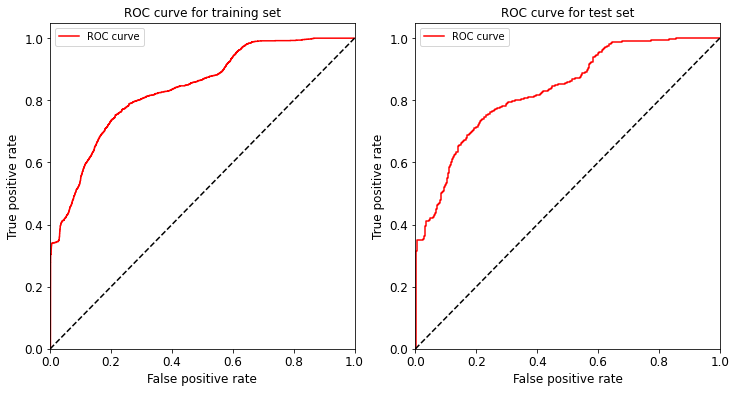

In [28]:
#plotting an ROC (Receiver Operator Characteristic) curve to evaluate the model performance visually. It illustrates the
#true positive rate against the false positive rate of our classifier. Best performing models will have an ROC curve that 
#hugs the upper left corner of the graph. This would represent that we correctly classify the positives much more often 
#than we incorrectly classify them. 

#the ROC curve dips slightly for both the train and test sets which suggests a dip in model performance but it's still 
#above the diagonal line

fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(1, 2, 1)
plt.plot(train_fpr, train_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for training set', fontsize = 12)

ax = plt.subplot(1, 2, 2)
plt.plot(test_fpr, test_tpr, label = 'ROC curve', color = 'red')

#plotting diagonal line from zero which represents a model that guesses incorrectly for every correct guess
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.legend()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('False positive rate', fontsize = 12)
plt.ylabel('True positive rate', fontsize = 12)
plt.title('ROC curve for test set', fontsize = 12)
plt.savefig('ROC_curves')

# **Predictions for unknown data**

In [29]:
#need to fit the unknown data on the logistic model. First droppping the churn column

X_unknown = unknown_data.drop('churned_after_six', axis = 1)

#saving the X value columns to a separate list for reassigning after scaling the data
X_unknown_columns = X_unknown.columns

In [30]:
#scaling the numerical variables

#Already instantiated the scaler above - below code scales the data using the original scaler. 
#Converting to dataframe as well - otherwise it would be a NumPy array
X_unknown = pd.DataFrame(scaler.transform(X_unknown))

#reassign the column names
X_unknown.columns = X_unknown_columns
X_unknown.head()

,age,height,weight,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker,goals_high,...,trigger_emotions,trigger_other,trigger_routine,trigger_social,trigger_stress,trigger_supermarket,trigger_tired,trigger_treats,message_type_group,message_type_private
0,0.04,0.130705,0.337893,0.0,0.774553,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.04,0.130705,0.337893,0.0,0.556447,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.04,0.130705,0.337893,0.0,0.488932,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.04,0.130705,0.337893,0.5,0.510499,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.04,0.130705,0.337893,0.5,0.500830,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
#predicting for unknown users - the model has predicted no churn for all users...
predictions_unknown = logistic_model.predict(X_unknown)
predictions_unknown

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
#converting predictions into a dataframe
predictions = pd.DataFrame(predictions_unknown, columns = ['predictions'])
predictions.head()

,predictions
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [33]:
#filtering for the 10 unknown users
all_data_unknown = all_data[all_data['churned_after_six'].isnull()].reset_index(drop = True)

In [34]:
#concatenating all data and predictions tables
all_data_unknown = pd.concat([all_data_unknown, predictions], axis = 1)
all_data_unknown.head()

,user_id,goals,gender,motivation,challenge,trigger,age,height,weight,churned_after_six,message_type,week_number,sentiment,questions_asked,emojis_used,mentioned_scales,mentioned_tracker,predictions
0,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,1.026933,0.0,0.0,0.0,0.0,0.0
1,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.295621,0.0,0.0,0.0,0.0,0.0
2,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,group,0,0.069245,0.0,0.0,0.0,0.0,0.0
3,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.141559,0.0,0.0,0.0,0.0,0.0
4,5a2e417806d240124a6185a0,medium,F,looks,motivation,tired,25,156.2,99.3,NaN,private,3,0.109137,0.0,0.0,0.0,0.0,0.0


In [35]:
#separating out predictions for all users - model predicts all users will not churn
user_predictions = all_data_unknown.groupby(['user_id'])['predictions'].value_counts().to_frame()
user_predictions

,,predictions
user_id,predictions,
5a2e417806d240124a6185a0,0.0,5
5ca8f158540a036b663a34df,0.0,12
5cba40489203684bd4c4e04f,0.0,54
5cbc31e194b8d6115731aed9,0.0,75
5cc929eba4cedc162e6df3c2,0.0,29
5cd520832925a912cbdd6061,0.0,21
5cd69b69fb622f12c5a74008,0.0,66
5cd89558f2f52212d094bd8e,0.0,2
5cd976930b932012b968558e,0.0,15
